In [1]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('amazon_cells_labelled.txt',on_bad_lines='skip',delimiter='\t',header=None,
                names=['text','label'])
df

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [4]:
import matplotlib.pyplot as plt

In [5]:
neg = df[df['label'] ==0]
pos = df[df['label'] ==0]

In [6]:
size = [50,50]
names = ['positive','Negative']

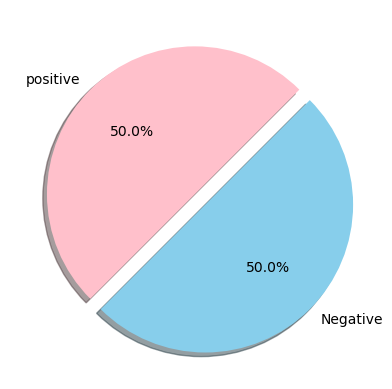

In [7]:
plt.pie(size,labels=names,shadow=True,colors=['pink','skyblue'],startangle=45,explode=(0, 0.1),autopct ='%1.1f%%')
plt.show()

In [8]:
import string 
from string import punctuation
import re
import nltk
from nltk.corpus import stopwords
stopword = nltk.corpus.stopwords.words('english')
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [9]:
def clean_text(text):
    text_nopunct = ''.join([char for char in text if char not in string.punctuation])
    tokenzie = re.split('\W+',text_nopunct)
    clean_text = ' '.join([ps.stem(word) for word in tokenzie if word not in stopword])
    no_number = re.sub('\d+',' ',clean_text)
    return no_number

df['final_clean'] = df['text'].apply(lambda x : clean_text(x))

In [10]:
df

,text,label,final_clean
0,So there is no way for me to plug it in here i...,0,so way plug us unless i go convert
1,"Good case, Excellent value.",1,good case excel valu
2,Great for the jawbone.,1,great jawbon
3,Tied to charger for conversations lasting more...,0,tie charger convers last minutesmajor problem
4,The mic is great.,1,the mic great
...,...,...,...
995,The screen does get smudged easily because it ...,0,the screen get smudg easili touch ear face
996,What a piece of junk.. I lose more calls on th...,0,what piec junk i lose call phone
997,Item Does Not Match Picture.,0,item doe not match pictur
998,The only thing that disappoint me is the infra...,0,the thing disappoint infra red port irda


In [11]:
X = df['final_clean']
y = df['label']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vect_count = CountVectorizer()
X_vect_count = vect_count.fit_transform(X_train)
X_test_count = vect_count.transform(X_test)

In [15]:
vect_count.get_feature_names_out()

array(['abhor', 'abil', 'abl', ..., 'youd', 'youll', 'zero'], dtype=object)

In [16]:
X_cound_df = pd.DataFrame(X_vect_count.toarray(),columns=vect_count.get_feature_names_out())

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=50,n_jobs=-1,random_state=42)
rf_model = rf.fit(X_cound_df,y_train)
y_pred = rf_model.predict(X_test_count)

C:\Users\Praveen\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

78.0

In [20]:
from sklearn.model_selection import cross_val_score
kfold = cross_val_score(rf,X_cound_df,y_train,cv=5,n_jobs=-1,scoring='accuracy')
np.mean(kfold)

0.7887500000000001

In [21]:
import wordcloud

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X1_tfidf = tfidf.fit_transform(X_train)
X1_test_tfidf = tfidf.transform(X_test)


In [24]:
tfidf.get_feature_names_out()

array(['abhor', 'abil', 'abl', ..., 'youd', 'youll', 'zero'], dtype=object)

In [25]:
X1_tfidf_df = pd.DataFrame(X1_tfidf.toarray(),columns=tfidf.get_feature_names_out())

In [26]:
X1_tfidf_df

,abhor,abil,abl,abound,abovepretti,absolut,absolutel,ac,accept,access,...,wrong,wrongfirst,ye,year,yell,yet,you,youd,youll,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.ensemble import RandomForestClassifier
classy = RandomForestClassifier()
classy_model = classy.fit(X1_tfidf_df,y_train)

In [28]:
y1_pred = classy_model.predict(X1_test_tfidf)

C:\Users\Praveen\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
accuracy_tfidf = accuracy_score(y_test,y1_pred)
accuracy_tfidf*100

78.0

In [35]:
neg_reviews = df[df['label'] == 0]['final_clean']

In [36]:
pos_reviews = df[df['label'] == 1]['final_clean']

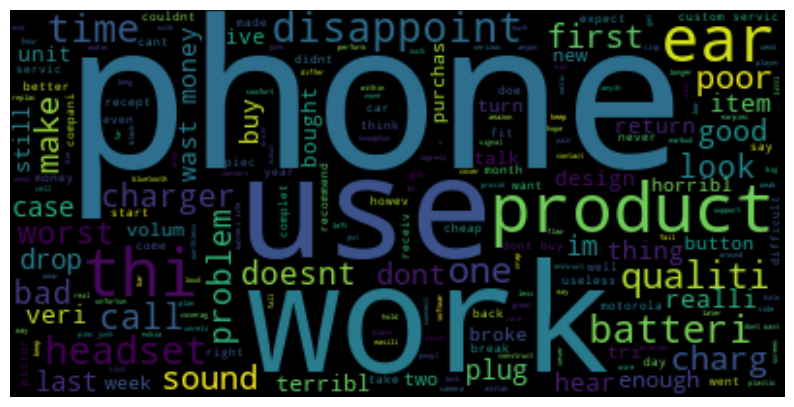

In [38]:
import wordcloud
from wordcloud import WordCloud
des = ' '.join([n for n in neg_sentiment])
description = WordCloud().generate(des)
plt.figure(figsize=(10,10))
plt.imshow(description,interpolation='bilinear')
plt.axis('off')
plt.show()

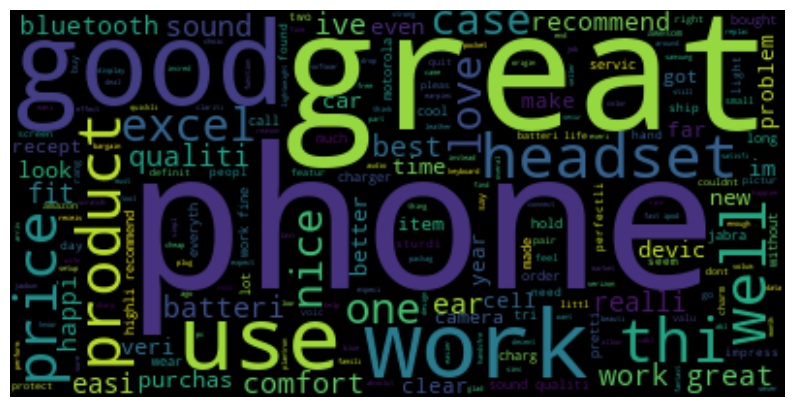

In [39]:
import wordcloud
from wordcloud import WordCloud
des = ' '.join([n for n in pos_reviews])
description = WordCloud().generate(des)
plt.figure(figsize=(10,10))
plt.imshow(description,interpolation='bilinear')
plt.axis('off')
plt.show()